<a href="https://colab.research.google.com/github/sundarjhu/UACJ_Jornada2021/blob/main/Espectro_UACJ_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del espectro óptico de KISSR 298

# Cómo bajar el espectro de la base de datos del Sloan Digital Sky Survey (SDSS)

## Método Manual de obtención de las coordenadas del objeto.

Para poder bajar su espectro de la base de datos, necesitamos sus coordenadas (RA, Dec) o (longitude, latitude) en el sistema de referencia Equatorial (J2000.0). 

INSTRUCCIONES. 

* Encuentra las coordenadas buscando al objeto por su nombre (KISSR 298) en la  base de datos de NED:
https://ned.ipac.caltech.edu/.

* Asigna a las variables de abajo las coordenadas del objecto que encontraste.



In [137]:
RA_manual=0 #202.457480 longitude in Equatorial J2000
Dec_manual=0 #29.579716 latitude in Equatorial J2000

## Método Automático de obtención de las coordenadas del objeto.

Installamos el paquete necesario para bajar las coordenadas.

In [138]:
!pip install astroquery

La ventaja de obtener de manera automática las coordenadas es evitar errores. El método automático se muestra a continuación.

In [139]:
from astroquery.ned import Ned
tabla_ned = Ned.query_object("KISSR 298")

# Desplegamos la tabla
print("TABLA DE NED")
print("\n")
print(tabla_ned) # tabla_ned es una astropy.table.Table
print("\n\n")

# Es más fácil de leer las columnas así
print("COLUMNAS DE LA TABLA DE NED")
print("\n")
print(tabla_ned.info)
print("\n\n")

# Desplegamos la primer línea de la tabla con los nombres de las columnas (esta tabla solo tiene una línea de datos).
print("NOMBRE DE LAS COLUMNAS Y PRIMER LÍNEA DE LA TABLA")
print("\n")
print(tabla_ned[0])
print("\n\n")

# Asignamos a la variable "coordenadas" texto que incluye las coordenadas del objeto y sus unidades.
coordenadas=f'{tabla_ned[0][2]}deg {tabla_ned[0][3]}deg'
print("CONTENIDO DE LA VARIABLE COORDENADAS")
print("\n")
print(coordenadas)
print("\n\n")

TABLA DE NED


No.       Object Name           RA     ... Diameter Points Associations
                             degrees   ...                             
--- ----------------------- ---------- ... --------------- ------------
  1 2MASX J13294981+2934455  202.45748 ...              10            0



COLUMNAS DE LA TABLA DE NED


<Table length=1>
        name          dtype    unit   format                                            description                                           n_bad
-------------------- ------- ------- -------- ----------------------------------------------------------------------------------------------- -----
                 No.   int32                                                         A sequential object number applicable to this list only.     0
         Object Name   str30                                                                                NED preferred name for the object     0
                  RA float64 degrees {!r:>10}          

## Método manual de obtención de los IDs de la placa, fecha de observación y fibra con que se obtuvieron los datos de SDSS.

Para bajar el espectro de KISSR 298 la base de datos, necesitamos los IDs de la placa, la fecha y la fibra con que se usaron para obtener los datos. 

INSTRUCCIONES. 

*   Busca el objecto usando las coordenadas en: https://skyserver.sdss.org/dr14/en/tools/chart/chartinfo.aspx. 
*   Dále a "Get Image" para ver la imagen del objeto. Puedes cambiar el tamaño de la imagen con los botones de "+" y "-".
* Haz click en "Explore" para ir a donde se encuentra el espectro. 
* Abajo a la derecha, en donde dice "Interactive Spectrum", hay una tabla con información sobre las observaciones del objeto. 
* Asigna a las variables de abajo las coordenadas del objecto que encontraste.





In [140]:
plate_manual=-1 #1978 plate
mjd_manual=-1 #53473 modified Julian date
fiberid_manual=-1 #371 fiberid

#Bajamos el archivo con el espectro de la base de datos de SDSS usando los IDs de arriba.
archivo_con_espectro_man = 'https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid='+str(plate_manual)+'&mjd='+str(mjd_manual)+'&fiberid='+str(fiberid_manual)

## Método Automático de obtención de los IDs de la placa, fecha de observación y fibra.

In [141]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos = coords.SkyCoord(coord, frame='icrs')
tabla_sdss = SDSS.query_region(pos, spectro=True)

print("Tabla de SDSS")
print(tabla_sdss[0])
print("\n\n")

print("Elementos de la tabla que necesitamos.")
plate=tabla_sdss[0][8] # plate
mjd=tabla_sdss[0][9] # modified Julian date
fiberid=tabla_sdss[0][10] # fiberid
print(f'plate: {plate}\n mjd: {mjd}\n fiberid: {fiberid}')
print("\n\n")

#Bajamos el archivo con el espectro de la base de datos de SDSS usando los IDs de arriba.
archivo_con_espectro_aut = 'https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid='+str(plate)+'&mjd='+str(mjd)+'&fiberid='+str(fiberid)

Tabla de SDSS
       ra              dec               objid        run  rerun camcol field     z      plate  mjd  fiberID      specobjid      run2d instrument
---------------- ---------------- ------------------- ---- ----- ------ ----- ---------- ----- ----- ------- ------------------- ----- ----------
202.457448174821 29.5797191488763 1237667259357790380 5072   301      5    39 0.04897743  1978 53473     371 2227132053705484288    26       SDSS



Elementos de la tabla que necesitamos.
plate: 1978
 mjd: 53473
 fiberid: 371





/usr/local/lib/python3.7/dist-packages/astroquery/sdss/core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


Importamos los paquetes necesarios para abrir el archivo con el espectro y graficarlo.

In [142]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.visualization import quantity_support
quantity_support()  # para obtener las unidades en los ejes de la gráfica de abajo.

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f6fc5ee0a50>

El espectro está en un archivo con formato fits.

Abrimos el archivo y contruimos los vectores de longitudes de onda (wave),  flujos (flux), y de errores en los flujos (err).

In [143]:
f = fits.open(archivo_con_espectro_aut) 

#El espectro está en el segundo encabezado del archivo (f[1])
specdata = f[1].data 
f.close()

wave = 10**specdata['loglam'] * u.AA # longitud de onda
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') # flujo
ivar = specdata['ivar']# inverso de la varianza
err = 1 / np.sqrt(ivar) # error * u.Unit('erg cm-2 s-1 AA-1') # error en el flujo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Instalamos el paquete specutils que permite poner las unidades correctas en los ejes de la gráfica del espectro.

# Método manual de poner unidades en los ejes de las gráficas.

Poner las unidades de los ejes de manera manual en las gráficas puede llevar a errores. ¿Qué errores notas en las unidades de los ejes de la gráfica de abajo (compara con la gráfica del método automático de más abajo)?

Text(0, 0.5, 'Flux (Anstron/cm/s)')

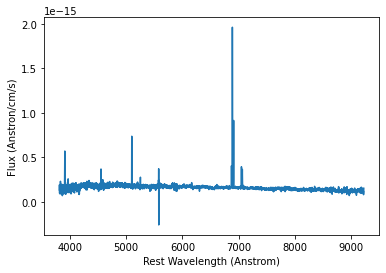

In [144]:
f, ax = plt.subplots()  
ax.plot(wave, flux)
plt.xlabel('Rest Wavelength (Anstrom)') 
plt.ylabel('Flux (Anstron/cm/s)')

## Método automático de poner las unidades en la gráfica.

Instalamos un paquete que nos permite hacer esto.

In [145]:
!pip install specutils

Vamos a crear un objeto llamado "Spectrum1D" que vamos a graficar.

In [146]:
from specutils import Spectrum1D
spec = Spectrum1D(spectral_axis=wave, flux=flux)

Graficamos el espectro. La ventaja de specutils es que las unidades de los ejes de la gráfica están correctas.

Text(0, 0.5, 'Flujo (erg / (Angstrom cm2 s))')

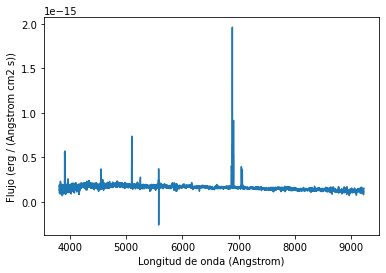

In [167]:
f, ax = plt.subplots()  
ax.step(spec.spectral_axis, spec.flux)
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit)) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit))

# Corrección del espectro por polvo en la Vía Láctea

Vamos a corregir la luz de las estrellas que se encuentran en la galaxia KISSR 298 por extinción debida al polvo en nuestra Galaxia.

Para esto, necesitamos el exceso de color debido al polvo en nuestra Galaxia en la dirección de KISSR 298. 

INSTRUCCIONES.

* Para calcular el exceso de color, E(B-V), primero encuentra la extinción Galáctica en las bandas Landolt B y V. Para esto ve a: https://ned.ipac.caltech.edu/ 
* Introduce el nombre del objeto
* Ve a la pestaña de Galactic Extinction
* Ve a la columna "Galactic Extinctions", en donde encontrarás los valores de B y V.
* Asigna a las variables B y V de abajo, el valor de las extinciones en para observacioens en los filstros B y V.



In [148]:
B=0.062 #0.062 extinción Galáctica en la banda B
V=0.047 #0.047 extinción Galáctica en la banda V
ebvmw=B-V # exceso de color E(B-V) de la Vía Láctea (Milky Way)

Importamos el paquete necesario para hacer la corrección por polvo.

In [149]:
!pip install git+https://github.com/karllark/dust_extinction.git

  Cloning https://github.com/karllark/dust_extinction.git to /tmp/pip-req-build-nj4y88to
  Running command git clone -q https://github.com/karllark/dust_extinction.git /tmp/pip-req-build-nj4y88to
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dust-extinction: filename=dust_extinction-1.1.dev1+g8bd0b2f-cp37-none-any.whl size=424827 sha256=6b347846fd55f33c469ca8ac667f08814a7340623a8f39f50dfd2ec9f74d53c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-fuiszm8i/wheels/bc/75/93/10949c6b5bee8da271150d593844866943a9fb3e42dff15e9c
Successfully built dust-extinction


Importamos la función que me permite corregir el flujo en cada longitud de onda debida al polvo para el valor de ebvmw dado.

In [150]:
# Importamos el modelo de Cardelli, Clayton & Mathis (1989) con A_V = 1 y R_V = 3.1
from dust_extinction.parameter_averages import CCM89
from scipy.optimize import curve_fit

# Definimos el modelo de enrojecimiento debido al polvo

ext = CCM89(Rv=3.1)



Calculamos el flujo corregido uflux.

In [159]:
# Flujo corregido (unextinguished flux )

uflux = flux / ext.extinguish(1/wave.to(u.micron), Ebv=0.1)

Graficamos el espectro antes y después de la corrección por enrojecimiento en la Vía Láctea. ¿Cuál es el espectro más luminoso y porqué?

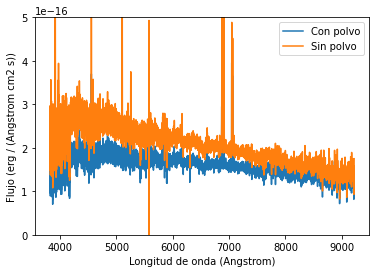

In [166]:
f, ax = plt.subplots()  

ax.step(spec.spectral_axis, spec.flux, label='Con polvo')
ax.plot(wave,uflux, label='Sin polvo')
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit)) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit))
plt.ylim(0,5e-16)
plt.legend()

# Corrección por corrimiento al rojo de la galaxia que se está moviendo radialmente respecto al observador.

INSTRUCCIONES. 

* Determina el corrimiento al rojo, z, de la galaxia usando la base de datos de NED.
* Asigna el corrimiento al rojo que encontraste a la variable z.



In [160]:
z=1 #0.04899 Corrimiento al rojo encontrado

In [153]:
wave_rest = wave / (1 + z)

Graficamos el espectro antes y después de la corrección por corrimiento al rojo.

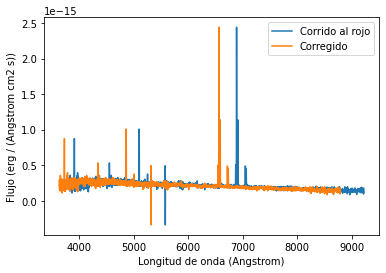

In [165]:
f, ax = plt.subplots()  

ax.plot(wave, uflux, label="Corrido al rojo")
ax.plot(wave_rest, uflux, label="Corregido")
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit)) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit))
plt.legend()